## Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install colorama

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = '/content/drive/MyDrive/PRJ_3040CustomerChurn/'
train_data = pd.read_csv(path + 'train.csv')

In [5]:
# Matplotlib Customization: Set various styling parameters for Matplotlib
rc = {
    # background color
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    # edge color
    "axes.edgecolor": "#000000",
    # grid color
    "grid.color": "#EBEBE7" + "30",
    # font family
    "font.family": "serif",
    # label color
    "axes.labelcolor": "#000000",
    # tick colors
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    # The grid alpha (transparency) is set to 0.4
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
# Seaborn Customization: Define a color palette that will be used by Seaborn for coloting the plots
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

# Colorama Styling:
# Style and Fore from the colorama library: can be used to apply styles and colors to console text
from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

# Matplotlib Style: Set the overall style of Matplotlib plots to 'fivethirtyeight', which is a predefined style resembling the plots used by the FiveThirtyEight website
plt.style.use('fivethirtyeight')

### Data Exploration

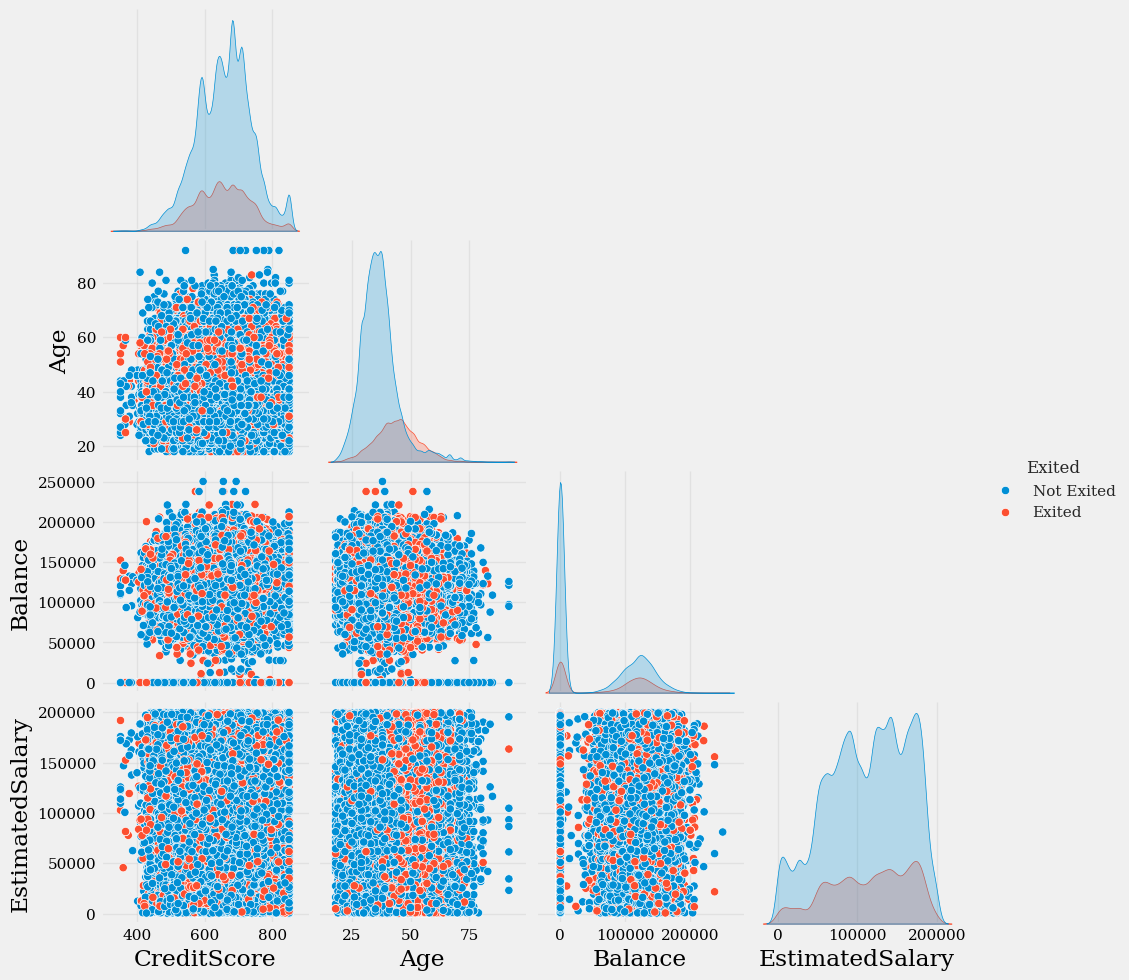

In [6]:
# Load data
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()

# Mapping dictionary for label changes
exit_label_mapping = {0: 'Not Exited', 1: 'Exited'}

# Change the values in the 'Exited' column using the mapping dictionary
df3['Exited'] = df3['Exited'].map(exit_label_mapping)

# Create a pairplot
sns.pairplot(df3, hue="Exited", corner=True)

# Show the plot
plt.show()

In [7]:
# Age range
print(f"Age Range: {train_data['Age'].min()} ~ {train_data['Age'].max()}")

Age Range: 18.0 ~ 92.0


In [8]:
# Grouping by age ranges

# Define the bins and corresponding labels for age groups
bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

# Create a new column 'Ages' in the 'train_data' DataFrame based on the specified bins and labels
train_data['Ages'] = pd.cut(train_data['Age'], bins, labels=age_labels)

# Print the modified DataFrame
print(train_data)

            id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  

In [9]:
# Count the occurrences of each unique value in the 'Ages' column
train_data['Ages'].value_counts()

,count
Ages,
30s,81253
40s,43319
20s,23202
50s,12186
60s,3920
70s,763
10s,332
80s,48
90s,11


In [10]:
# Create new datasets for each age group
group_10s = train_data.loc[train_data['Ages'] == '10s', :]
group_20s = train_data.loc[train_data['Ages'] == '20s', :]
group_30s = train_data.loc[train_data['Ages'] == '30s', :]
group_40s = train_data.loc[train_data['Ages'] == '40s', :]
group_50s = train_data.loc[train_data['Ages'] == '50s', :]
group_60s = train_data.loc[train_data['Ages'] == '60s', :]
group_70s = train_data.loc[train_data['Ages'] == '70s', :]
group_80s = train_data.loc[train_data['Ages'] == '80s', :]
group_90s = train_data.loc[train_data['Ages'] == '90s', :]

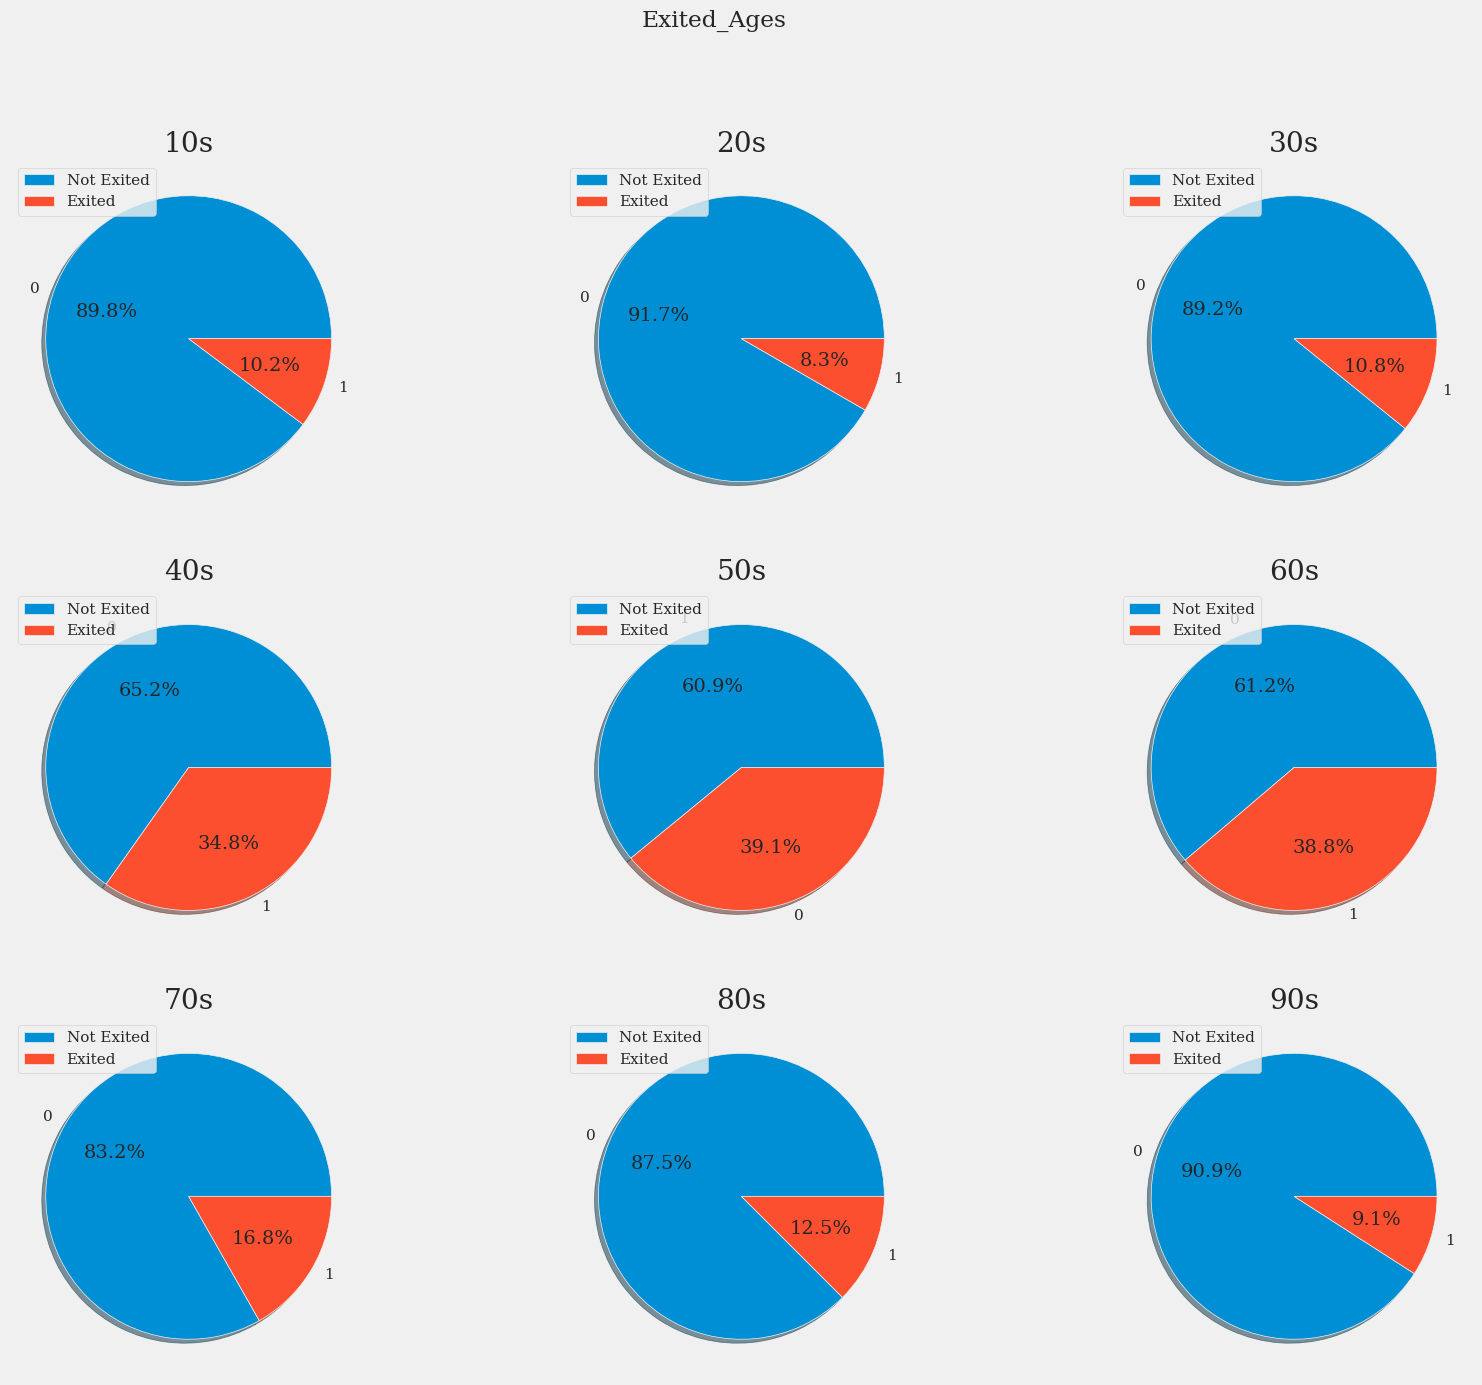

In [11]:
# Create a 3x3 subplot grid
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

# Define age groups and corresponding DataFrames
age_groups = {'10s': group_10s, '20s': group_20s, '30s': group_30s, '40s': group_40s,
              '50s': group_50s, '60s': group_60s, '70s': group_70s, '80s': group_80s, '90s': group_90s}

# Iterate over rows and columns of the subplot grid
for i, (age, group) in enumerate(age_groups.items()):
    row = i // 3
    col = i % 3

    # Plot pie chart for each age group
    pie_chart = group['Exited'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[row, col], shadow=True)
    ax[row, col].set_title(age)
    pie_chart.set_ylabel('')

    # Add legend for 'Not Exited' and 'Exited' at the top-left corner
    labels = ['Not Exited', 'Exited']
    ax[row, col].legend(labels, loc='upper left')

# Set the overall title for the entire figure
plt.suptitle('Exited_Ages')
plt.show()

### Chi-square test

In [12]:
# Create datasets for customers who exited in their 30s and 40s
exited_30s = group_30s.loc[group_30s['Exited'] == 1, :]
exited_40s = group_40s.loc[group_40s['Exited'] == 1, :]

# Concatenate the data for exited customers in their 30s and 40s
exited_3040s = pd.concat([exited_30s, exited_40s])

In [13]:
# Chi-square test for independence for Geography between exited customers in their 30s and 40s

# Importing necessary libraries
import numpy as np
from scipy.stats import chi2_contingency

# Creating a contingency table (cross-tab) for Ages and Geography
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['Geography'])

# Performing the Chi-square test for independence
chi2_geography, p_geography, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_geography:.3f}')
print(f'p = {p_geography:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_geography < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 21.585
p = 0.000
Reject the null hypothesis.


In [14]:
# Chi-square test for independence for Gender between exited customers in their 30s and 40s

# Creating a contingency table (cross-tab) for Ages and Gender
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['Gender'])

# Performing the Chi-square test for independence
chi2_gender, p_gender, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_gender:.3f}')
print(f'p = {p_gender:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_gender < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 14.056
p = 0.000
Reject the null hypothesis.


In [15]:
# Chi-square test for independence for Tenure between exited customers in their 30s and 40s

# Creating a contingency table (cross-tab) for Ages and Tenure
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['Tenure'])

# Performing the Chi-square test for independence
chi2_tenure, p_tenure, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_tenure:.3f}')
print(f'p = {p_tenure:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_tenure < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 18.167
p = 0.052
Fail to reject the null hypothesis.


In [16]:
# Chi-square test for independence for NumOfProducts between exited customers in their 30s and 40s

# Creating a contingency table (cross-tab) for Ages and NumOfProducts
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['NumOfProducts'])

# Performing the Chi-square test for independence
chi2_products, p_products, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_products:.3f}')
print(f'p = {p_products:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_products < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 44.150
p = 0.000
Reject the null hypothesis.


In [17]:
# Chi-square test for independence for HasCrCard between exited customers in their 30s and 40s

# Creating a contingency table (cross-tab) for Ages and HasCrCard
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['HasCrCard'])

# Performing the Chi-square test for independence
chi2_crcard, p_crcard, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_crcard:.3f}')
print(f'p = {p_crcard:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_crcard < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 21.744
p = 0.000
Reject the null hypothesis.


In [18]:
# Chi-square test for independence for IsActiveMember between exited customers in their 30s and 40s

# Creating a contingency table (cross-tab) for Ages and IsActiveMember
crcard_cross = pd.crosstab(exited_3040s['Ages'], exited_3040s['IsActiveMember'])

# Performing the Chi-square test for independence
chi2_active, p_active, dof, ef = chi2_contingency(crcard_cross, correction=False)

# Displaying the test statistics
print(f'Chi-square = {chi2_active:.3f}')
print(f'p = {p_active:.3f}')

# Interpreting the result based on the p-value
alpha = 0.05
if p_active < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square = 40.818
p = 0.000
Reject the null hypothesis.


### Independent samples t-test

In [19]:
# Testing homogeneity of variances for CreditScore between exited customers in their 30s and 40s

# Importing the Bartlett test
from scipy.stats import bartlett

# Performing Bartlett test for homogeneity of variances
statistic, p_value = bartlett(exited_30s['CreditScore'], exited_40s['CreditScore'])

# Setting the significance level (alpha)
alpha = 0.05

# Displaying the test statistics
print(f"p = {p_value:.3f}")

# Interpreting the result based on p-value
if p_value > alpha:
    print("Homogeneity of variances can be assumed.")
else:
    print("Homogeneity of variances cannot be assumed.")

p = 0.000
Homogeneity of variances cannot be assumed.


In [20]:
# Independent samples t-test for CreditScore between exited customers in their 30s and 40s

# Importing the necessary library
from scipy import stats

# Performing independent samples t-test
t_crscore, p_crscore = stats.ttest_ind(exited_30s['CreditScore'], exited_40s['CreditScore'], equal_var=False)

# Displaying the test statistics
print(f"t = {t_crscore:.3f}")
print(f"p = {p_crscore:.3f}")

# Interpreting the result based on the p-value
if p_crscore < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t = 0.228
p = 0.820
Fail to reject the null hypothesis.


In [21]:
# Testing homogeneity of variances for Balance between exited customers in their 30s and 40s

# Performing Bartlett test for homogeneity of variances
statistic, p_value = bartlett(exited_30s['Balance'], exited_40s['Balance'])

# Setting the significance level (alpha)
alpha = 0.05

# Displaying the test statistics
print(f"p = {p_value:.3f}")

# Interpreting the result based on p-value
if p_value > alpha:
    print("Homogeneity of variances can be assumed.")
else:
    print("Homogeneity of variances cannot be assumed.")

p = 0.822
Homogeneity of variances can be assumed.


In [22]:
# Independent samples t-test for Balance between exited customers in their 30s and 40s

# Performing independent samples t-test
t_balance, p_balance = stats.ttest_ind(exited_30s['Balance'], exited_40s['Balance'], equal_var=True)

# Displaying the test statistics
print(f"t = {t_balance:.3f}")
print(f"p = {p_balance:.3f}")

# Interpreting the result based on the p-value
if p_balance < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t = 2.291
p = 0.022
Reject the null hypothesis.


In [23]:
# Testing homogeneity of variances for EstimatedSalary between exited customers in their 30s and 40s

# Performing Bartlett test for homogeneity of variances
statistic, p_value = bartlett(exited_30s['EstimatedSalary'], exited_40s['EstimatedSalary'])

# Setting the significance level (alpha)
alpha = 0.05

# Displaying the test statistics
print(f"p = {p_value:.3f}")

# Interpreting the result based on p-value
if p_value > alpha:
    print("Homogeneity of variances can be assumed.")
else:
    print("Homogeneity of variances cannot be assumed.")

p = 0.001
Homogeneity of variances cannot be assumed.


In [24]:
# Independent samples t-test for EstimatedSalary between exited customers in their 30s and 40s

# Performing independent samples t-test
t_salary, p_salary = stats.ttest_ind(exited_30s['EstimatedSalary'], exited_40s['EstimatedSalary'], equal_var=False)

# Displaying the test statistics
print(f"t = {t_salary:.3f}")
print(f"p = {p_salary:.3f}")

# Interpreting the result based on the p-value
if p_salary < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t = -3.966
p = 0.000
Reject the null hypothesis.


### Visualization

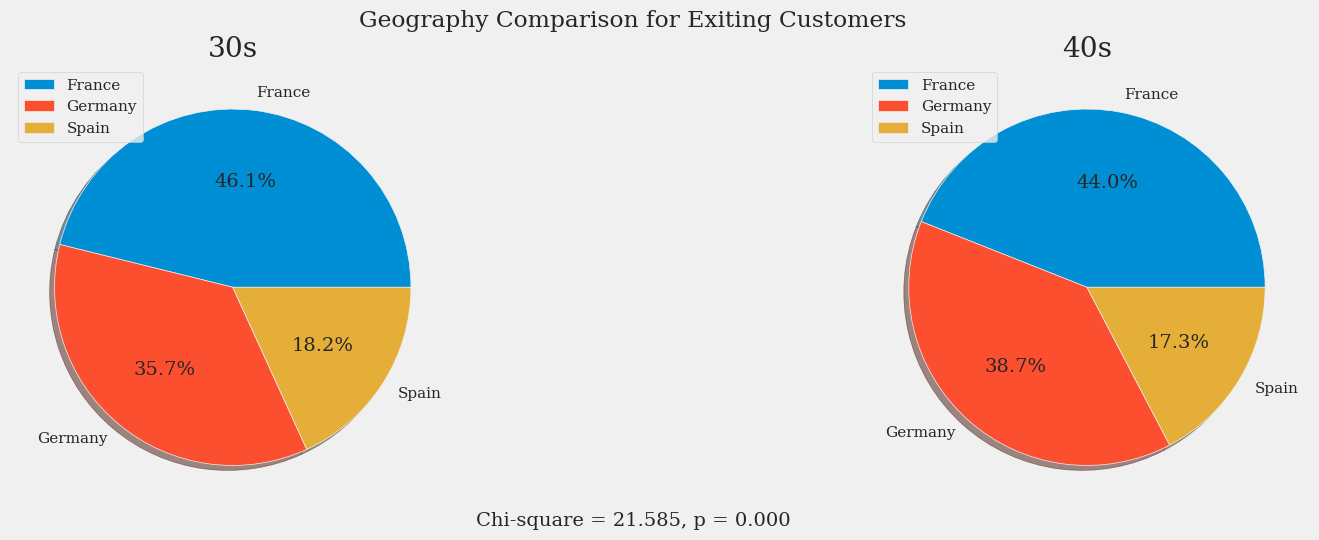

In [25]:
# Compare Geography for customers who exited in their 30s and 40s

# Importing the necessary library
import matplotlib.pyplot as plt

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))

# Iterate over age groups
for i, (age_group, exited_data) in enumerate([('30s', exited_30s), ('40s', exited_40s)]):
    # Plot pie chart for Geography in each age group
    exited_data['Geography'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i], shadow=True)
    ax[i].set_title(f'{age_group}')
    ax[i].set_ylabel('')

    # Add legend at the top-left corner
    labels = ['France', 'Germany', 'Spain']
    ax[i].legend(labels, loc='upper left')

# Add text below the center of the figure
fig.text(0.5, 0.05, f'Chi-square = {chi2_geography:.3f}, p = {p_geography:.3f}', ha='center', va='center')

# Set the overall title for the entire figure
plt.suptitle('Geography Comparison for Exiting Customers')
plt.show()

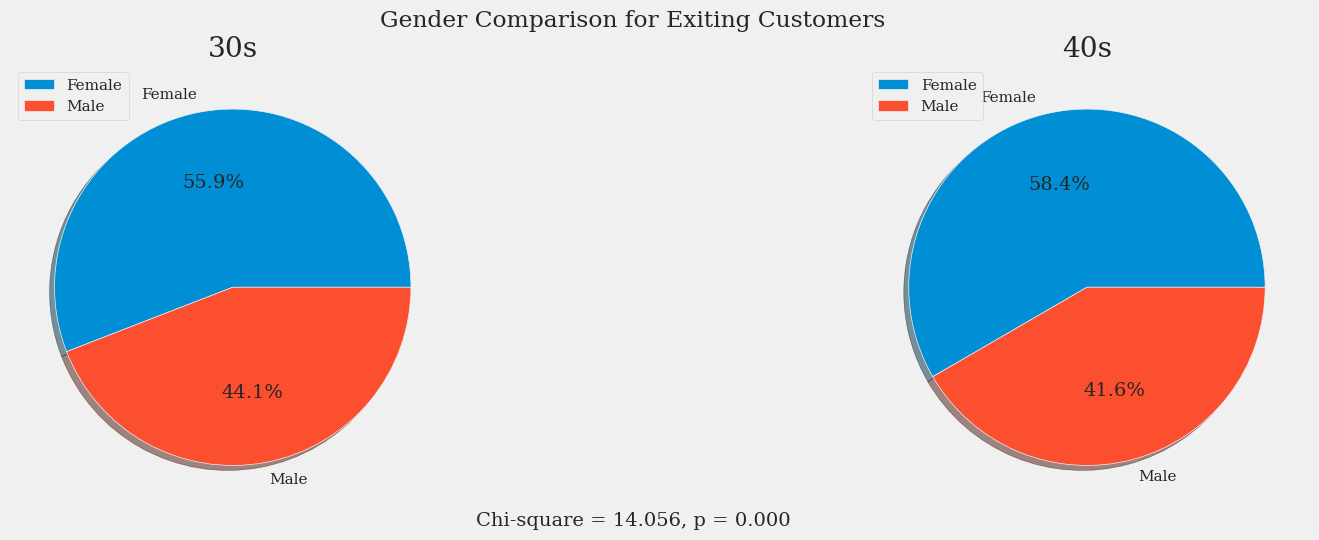

In [26]:
# Compare Gender for customers who exited in their 30s and 40s

# Importing the necessary library
import matplotlib.pyplot as plt

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))

# Iterate over age groups
for i, (age_group, exited_data) in enumerate([('30s', exited_30s), ('40s', exited_40s)]):
    # Plot pie chart for Gender in each age group
    exited_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i], shadow=True)
    ax[i].set_title(f'{age_group}')
    ax[i].set_ylabel('')

    # Add legend at the top-left corner
    labels = ['Female', 'Male']
    ax[i].legend(labels, loc='upper left')

# Add text below the center of the figure
fig.text(0.5, 0.05, f'Chi-square = {chi2_gender:.3f}, p = {p_gender:.3f}', ha='center', va='center')

# Set the overall title for the entire figure
plt.suptitle('Gender Comparison for Exiting Customers')
plt.show()

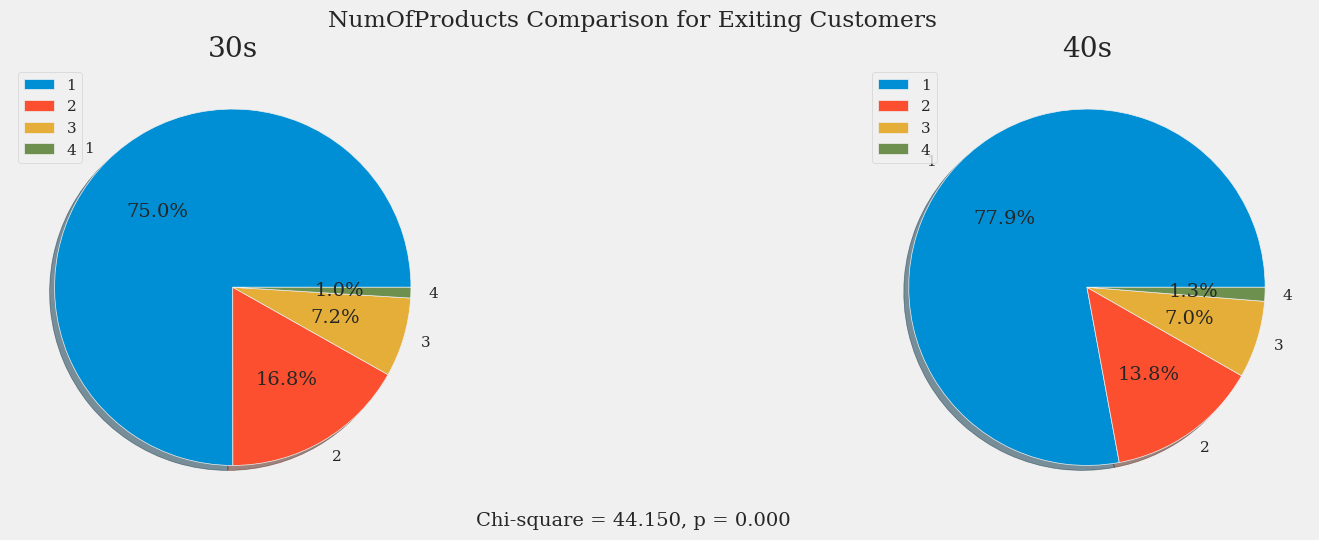

In [27]:
# Compare NumOfProducts for customers who exited in their 30s and 40s

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))

# Iterate over age groups
for i, (age_group, exited_data) in enumerate([('30s', exited_30s), ('40s', exited_40s)]):
    # Plot pie chart for Gender in each age group
    exited_data['NumOfProducts'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i], shadow=True)
    ax[i].set_title(f'{age_group}')
    ax[i].set_ylabel('')

    # Add legend at the top-left corner
    labels = ['1', '2', '3', '4']
    ax[i].legend(labels, loc='upper left')

# Add text below the center of the figure
fig.text(0.5, 0.05, f'Chi-square = {chi2_products:.3f}, p = {p_products:.3f}', ha='center', va='center')

# Set the overall title for the entire figure
plt.suptitle('NumOfProducts Comparison for Exiting Customers')
plt.show()

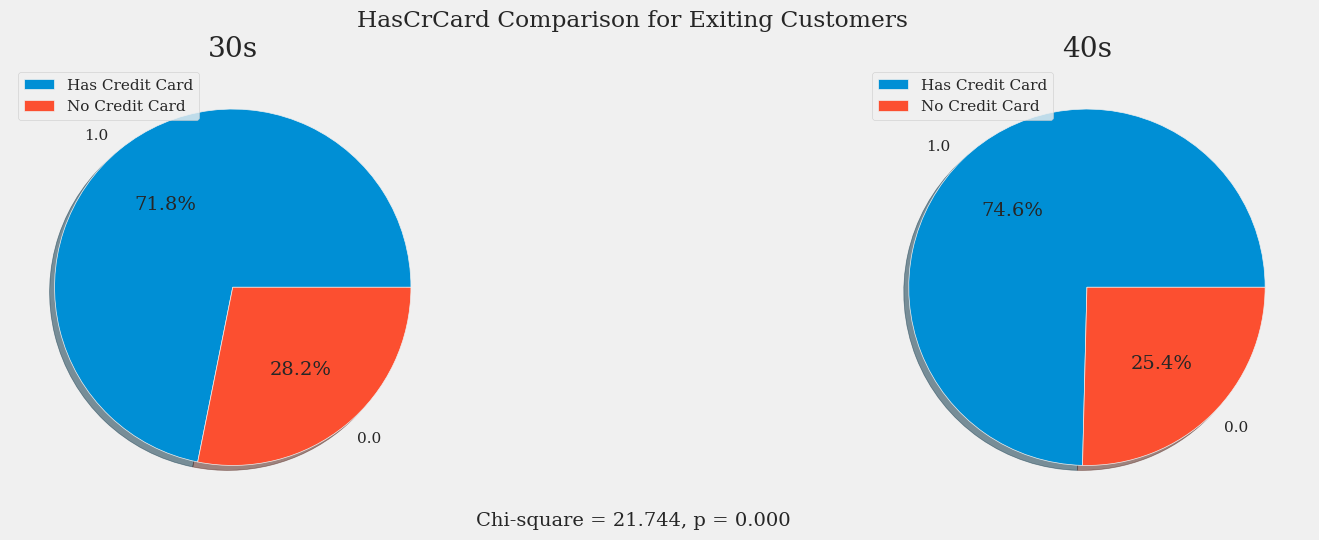

In [28]:
# Compare HasCrCard for customers who exited in their 30s and 40s

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))

# Iterate over age groups
for i, (age_group, exited_data) in enumerate([('30s', exited_30s), ('40s', exited_40s)]):
    # Plot pie chart for Gender in each age group
    exited_data['HasCrCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i], shadow=True)
    ax[i].set_title(f'{age_group}')
    ax[i].set_ylabel('')

    # Add legend at the top-left corner
    labels = ['Has Credit Card', 'No Credit Card']
    ax[i].legend(labels, loc='upper left')

# Add text below the center of the figure
fig.text(0.5, 0.05, f'Chi-square = {chi2_crcard:.3f}, p = {p_crcard:.3f}', ha='center', va='center')

# Set the overall title for the entire figure
plt.suptitle('HasCrCard Comparison for Exiting Customers')
plt.show()

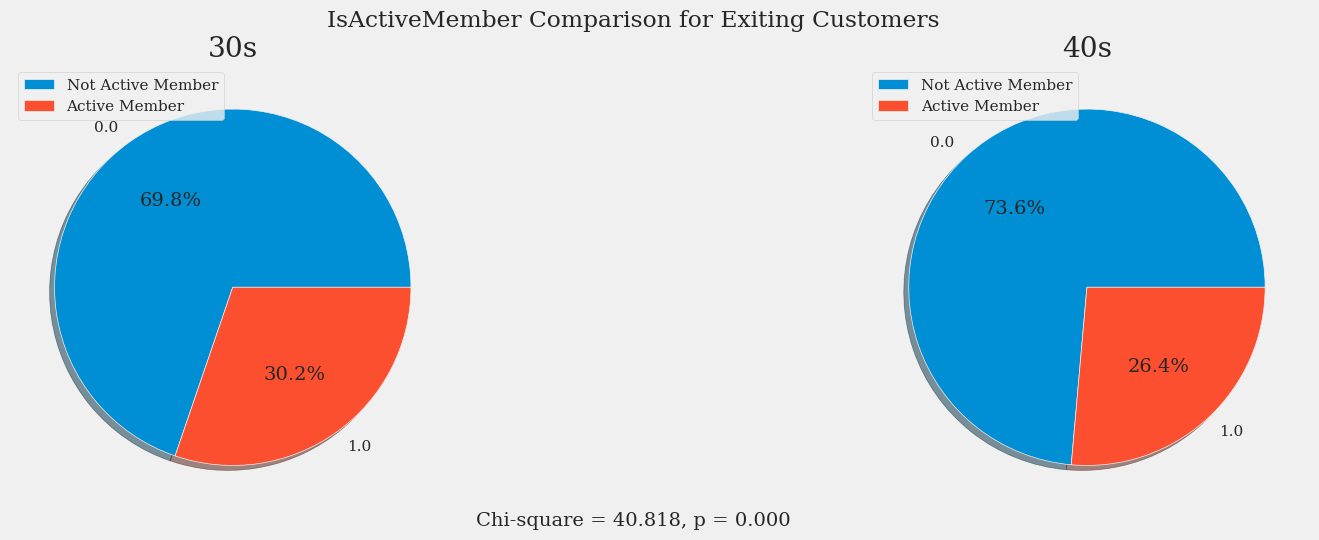

In [29]:
# Compare IsActiveMember for customers who exited in their 30s and 40s

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))

# Iterate over age groups
for i, (age_group, exited_data) in enumerate([('30s', exited_30s), ('40s', exited_40s)]):
    # Plot pie chart for Gender in each age group
    exited_data['IsActiveMember'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i], shadow=True)
    ax[i].set_title(f'{age_group}')
    ax[i].set_ylabel('')

    # Add legend at the top-left corner
    labels = ['Not Active Member', 'Active Member']
    ax[i].legend(labels, loc='upper left')

# Add text below the center of the figure
fig.text(0.5, 0.05, f'Chi-square = {chi2_active:.3f}, p = {p_active:.3f}', ha='center', va='center')

# Set the overall title for the entire figure
plt.suptitle('IsActiveMember Comparison for Exiting Customers')
plt.show()

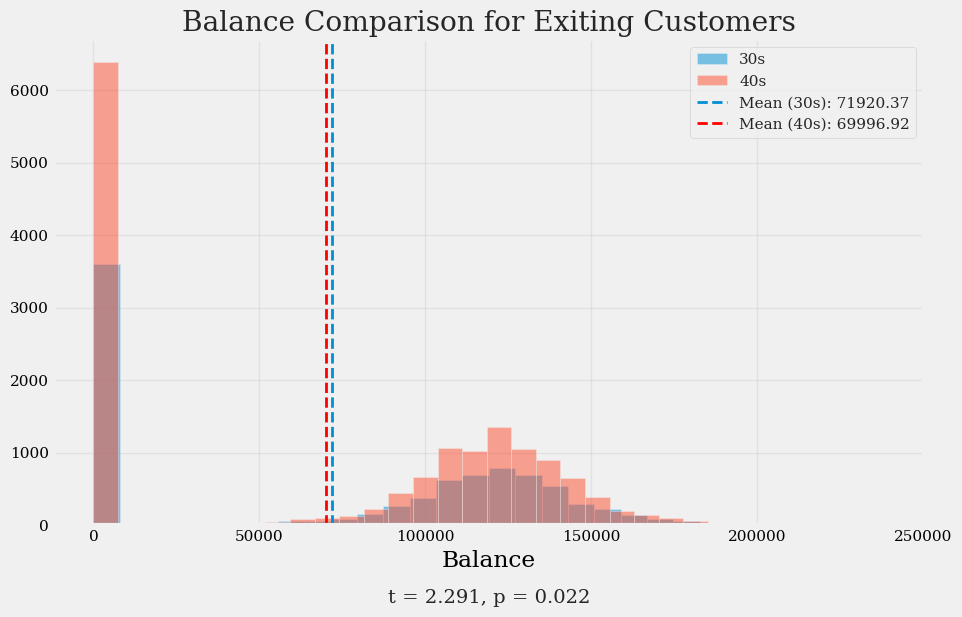

In [30]:
# Compare Balance for customers who exited in their 30s and 40s

# Importing the necessary library
import matplotlib.pyplot as plt

# Calculate mean values for Balance
balance_mean_30s = round(exited_30s['Balance'].mean(), 2)
balance_mean_40s = round(exited_40s['Balance'].mean(), 2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for Balance in their 30s and 40s
ax.hist(exited_30s['Balance'], bins=30, alpha=0.5, label='30s')
ax.hist(exited_40s['Balance'], bins=30, alpha=0.5, label='40s')

# Add dashed lines for mean values
ax.axvline(balance_mean_30s, linestyle='dashed', linewidth=2, label=f'Mean (30s): {balance_mean_30s}')
ax.axvline(balance_mean_40s, color='red', linestyle='dashed', linewidth=2, label=f'Mean (40s): {balance_mean_40s}')

# Set title and labels
ax.set_title('Balance Comparison for Exiting Customers')
ax.set_xlabel('Balance')
ax.set_ylabel('')
ax.legend()

# Add text below the center of the figure
ax.text(0.5, -0.15, f't = {t_balance:.3f}, p = {p_balance:.3f}', ha='center', va='center', transform=ax.transAxes)

# Show the plot
plt.show()

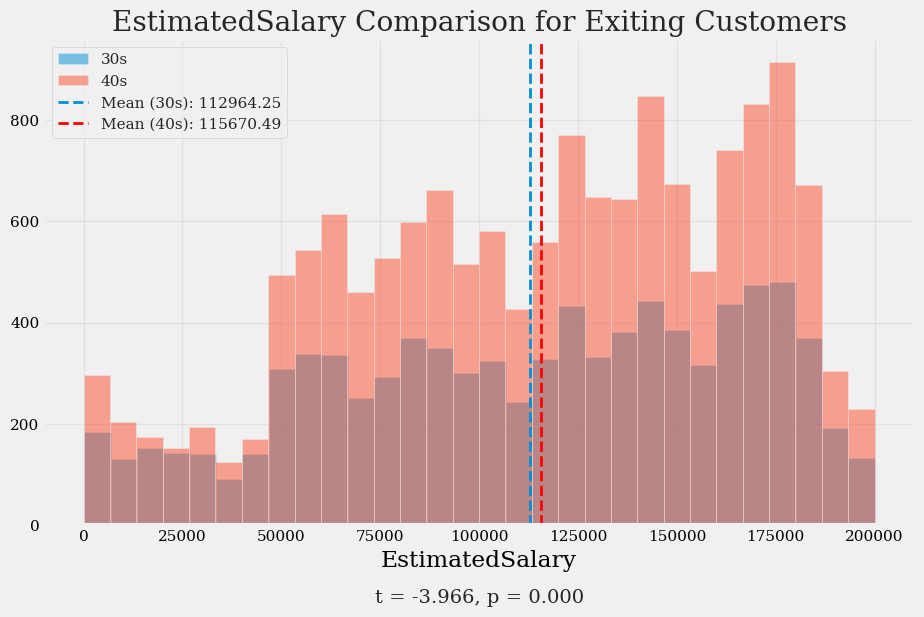

In [31]:
# Compare EstimatedSalary for customers who exited in their 30s and 40s

# Importing the necessary library
import matplotlib.pyplot as plt

# Calculate mean values for EstimatedSalary
salary_mean_30s = round(exited_30s['EstimatedSalary'].mean(), 2)
salary_mean_40s = round(exited_40s['EstimatedSalary'].mean(), 2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for EstimatedSalary in their 30s and 40s
ax.hist(exited_30s['EstimatedSalary'], bins=30, alpha=0.5, label='30s')
ax.hist(exited_40s['EstimatedSalary'], bins=30, alpha=0.5, label='40s')

# Add dashed lines for mean values
ax.axvline(salary_mean_30s, linestyle='dashed', linewidth=2, label=f'Mean (30s): {salary_mean_30s}')
ax.axvline(salary_mean_40s, color='red', linestyle='dashed', linewidth=2, label=f'Mean (40s): {salary_mean_40s}')

# Set title and labels
ax.set_title('EstimatedSalary Comparison for Exiting Customers')
ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('')
ax.legend()

# Add text below the center of the figure
ax.text(0.5, -0.15, f't = {t_salary:.3f}, p = {p_salary:.3f}', ha='center', va='center', transform=ax.transAxes)

# Show the plot
plt.show()